# Convolutional neural network
You tested above different models with the set of high-level features extracted from a pretrained neural network. However, can you get similar results by creating a ConvNet from scratch and using the pixel values from the original images to train the model?

 - What accuracy can you achieve?
 - Can you get good results? - If not, why?

In [1]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers, losses, metrics
from sklearn.preprocessing import StandardScaler
import tensorflow.keras as keras

import numpy as np
import pandas as pd
import os
import PIL.Image as Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# or we do not need to do image augmantation to change the dataset here
train_generator = ImageDataGenerator(rescale = 1/255)
valid_generator = ImageDataGenerator(rescale = 1/255)
test_generator = ImageDataGenerator(rescale = 1/255)

In [3]:
trainset = train_generator.flow_from_directory(
    os.path.join('swissroads','train'), batch_size = 280, target_size = (299,299), shuffle = False, class_mode = 'categorical')

validset = valid_generator.flow_from_directory(
    os.path.join('swissroads', 'valid'), batch_size = 139, target_size = (299, 299), shuffle = False, class_mode = 'categorical')

testset = test_generator.flow_from_directory(
    os.path.join('swissroads', 'test'), batch_size = 50, target_size = (299,299), shuffle = False, class_mode = 'categorical')

Found 280 images belonging to 6 classes.
Found 139 images belonging to 6 classes.
Found 50 images belonging to 6 classes.


Note: if in the above generator we set class_mode = 'sparse' then we get label encoding and not onehot encoding. The models expect one hot encoding so an error will be generated.

I check the output , at the very end to see wether I have a onehot encoding or label encoding.

In [4]:
trainset.next()

(array([[[[0.14901961, 0.15294118, 0.16862746],
          [0.15686275, 0.16078432, 0.1764706 ],
          [0.15294118, 0.15686275, 0.16862746],
          ...,
          [0.43921572, 0.43921572, 0.44705886],
          [0.43921572, 0.43921572, 0.44705886],
          [0.43137258, 0.43137258, 0.43921572]],
 
         [[0.14117648, 0.14509805, 0.16078432],
          [0.15294118, 0.15686275, 0.17254902],
          [0.15294118, 0.15686275, 0.16862746],
          ...,
          [0.43921572, 0.43921572, 0.44705886],
          [0.4431373 , 0.4431373 , 0.45098042],
          [0.43921572, 0.43921572, 0.44705886]],
 
         [[0.14509805, 0.14901961, 0.16470589],
          [0.14901961, 0.15294118, 0.16862746],
          [0.15294118, 0.15686275, 0.17254902],
          ...,
          [0.43137258, 0.43137258, 0.43921572],
          [0.43921572, 0.43921572, 0.44705886],
          [0.43137258, 0.43137258, 0.43921572]],
 
         ...,
 
         [[0.7686275 , 0.7411765 , 0.69411767],
          [0.80392

Oconv = (i +2p - k)/s + 1


Opool = (i-k)/s + 1

i: input size
p: padding
k: kernel
s: stride

    same:  p = (k-1)/2
    valid: p = 0

$o_{\text{conv}}=\left\lfloor \frac{i+2p-k}{s}\right\rfloor +1\qquad o_{\text{pool}}=\left\lfloor \frac{i-k}{s}\right\rfloor +1$

In [5]:
(299+2*0-4)/1 + 1 

296.0

In [6]:
(298-3)/2 + 1

148.5

In [7]:
(148 +2-15)/2 +1

68.5

In [8]:
(26-4)/2 + 1

12.0

#### How do I choose the topology? --> GridSearchCV

In [9]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(filters = 16, kernel_size = 5, strides = 1, activation = 'relu', input_shape = (299,299,3)))
model.add(keras.layers.MaxPool2D(pool_size=2))       
model.add(keras.layers.Conv2D(filters = 16, kernel_size = 3, strides = 1, activation = 'relu'))
# maxpool
model.add(keras.layers.MaxPool2D(pool_size=2)) 
model.add(keras.layers.Flatten())
# dense
model.add(Dense(16, activation = 'relu'))
model.add(keras.layers.Dense(units=trainset.num_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 295, 295, 16)      1216      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 147, 147, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 145, 145, 16)      2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 72, 72, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 82944)             0         
_________________________________________________________________
dense (Dense)                (None, 16)                1327120   
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 102       
Total para

In [2]:
model.compile(optimizer = keras.optimizers.Adam(), loss = 'mae', metrics = ['mae'])

NameError: name 'model1L' is not defined

In [11]:
early_stopping = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 6)

I will use the raw images to train the model

In [12]:
history = model.fit_generator(
                generator = trainset, validation_data = validset, epochs = 100, callbacks = [early_stopping])

Epoch 1/100
1/1 [==============================] - 34s 34s/step - loss: 1.8171 - acc: 0.1143 - val_loss: 2.6640 - val_acc: 0.2302
Epoch 2/100
1/1 [==============================] - 15s 15s/step - loss: 2.6713 - acc: 0.2286 - val_loss: 1.9203 - val_acc: 0.1151
Epoch 3/100
1/1 [==============================] - 14s 14s/step - loss: 1.9034 - acc: 0.1143 - val_loss: 1.8686 - val_acc: 0.1151
Epoch 4/100
1/1 [==============================] - 17s 17s/step - loss: 1.8368 - acc: 0.1107 - val_loss: 1.7808 - val_acc: 0.2590
Epoch 5/100
1/1 [==============================] - 14s 14s/step - loss: 1.7459 - acc: 0.2214 - val_loss: 1.7875 - val_acc: 0.2014
Epoch 6/100
1/1 [==============================] - 13s 13s/step - loss: 1.7669 - acc: 0.2821 - val_loss: 1.7864 - val_acc: 0.2014
Epoch 7/100
1/1 [==============================] - 13s 13s/step - loss: 1.7623 - acc: 0.2607 - val_loss: 1.7803 - val_acc: 0.1871
Epoch 8/100
1/1 [==============================] - 13s 13s/step - loss: 1.7465 - acc: 0.20

In [13]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

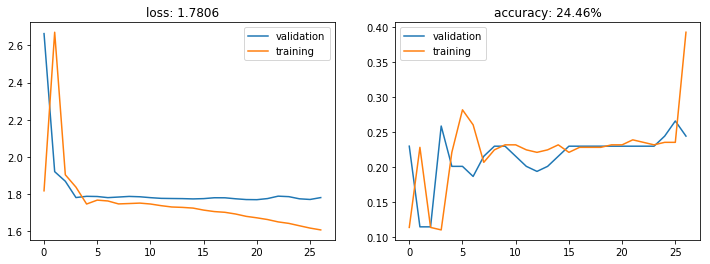

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot loss values
ax1.set_title('loss: {:.4f}'.format(history.history['val_loss'][-1]))
ax1.plot(history.history['val_loss'], label='validation')
ax1.plot(history.history['loss'], label='training')
ax1.legend()

# plot accuracy values
ax2.set_title('accuracy: {:.2f}%'.format(history.history['val_acc'][-1]*100))
ax2.plot(history.history['val_acc'], label='validation')
ax2.plot(history.history['acc'], label='training')
ax2.legend()

plt.show()

The accuracy is very poor. The results will not be as good as when using the pretrained high-level features.

In [15]:
test_preds = model.predict_generator(testset)
print('Predictions:', test_preds.shape) 

Predictions: (50, 6)


In [16]:
from sklearn.metrics import confusion_matrix
import pandas as pd

# Compute confusion matrix
matrix = confusion_matrix(
    y_true=testset.classes, # array with true labels
    y_pred=test_preds.argmax(axis=1) # array with predicted labels
)

# Format as a DataFrame
class_names = list(testset.class_indices.keys())
matrix_df = pd.DataFrame(data=matrix, columns=class_names, index=class_names)
matrix_df.columns.name = 'Predictions'
matrix_df.index.name = 'True class'
matrix_df

Predictions,bike,car,motorcycle,other,truck,van
True class,,,,,,
bike,0,12,0,0,0,0
car,0,10,1,0,0,0
motorcycle,0,8,1,0,0,0
other,0,5,1,0,0,0
truck,0,6,1,0,0,0
van,0,4,1,0,0,0


We see that a lot of the predictions are totally wrong, e.g. for the truck, van.

In [17]:
(test_loss, test_accuracy) = model.evaluate_generator(testset)
print('Test loss: {:.2f}, accuracy: {:.2f}%'.format(test_loss, test_accuracy*100))
# Output varies with an accuracy score around 52% and a loss around 1.4

Test loss: 1.77, accuracy: 22.00%


In [18]:
accuracy_cnn = test_accuracy
accuracy_cnn

0.2199999988079071

In [19]:
results_cnn = { 'model': ['cnn'], 'accuracy' : [test_accuracy] }
results_cnn = pd.DataFrame(results_cnn)
np.save('results_cnn', results_cnn)
results_cnn

,model,accuracy
0,cnn,0.22


In [20]:
model.layers

### Question: how do I plot the weights?

In [21]:
# Retrieve first hidden layer
hidden = model.layers[0]

# Get weights/biases
weights_hidden, biases_hidden = hidden.get_weights()

# see weights
weights_hidden.shape

(5, 5, 3, 16)

(5, 5, 3, 16)


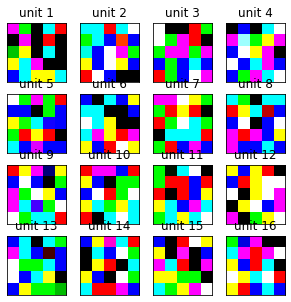

In [22]:
# Retrieve first hidden layer
hidden = model.layers[0]

# Get weights/biases
weights_hidden, biases_hidden = hidden.get_weights()

weights_hidden.shape

print(weights_hidden.shape)
# Create figure with 16 subplots
fig, axes = plt.subplots(nrows = 4, ncols = 4, figsize = (5,5))

# Plot the weights of the 16 hidden units
for i, axis in enumerate(axes.flatten()):
    # Get weights of i-th hidden unit
    weights = weights_hidden[:,:,:,i]
    weights.shape
    
    # Reshape into 
    weights = weights.reshape(5,5,3)
    
    # Plot weights
    axis.set_title('unit {}'.format(i+1))
   # axis.imshow(weights, cmap = plt.cm.gray_r)
    axis.imshow(255*weights)
    axis.get_xaxis().set_visible(False)
    axis.get_yaxis().set_visible(False)
    
plt.show()    